**Obtenção dos Dados**

Para esta análise exploratória, será utilizado o seguinte arquivo:

* supermaket_sales.csv * 

Informações para sobre cada coluna dataset e das análises feitas, leia o README

## Importando as bibliotecas ##

In [15]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

## Carregando os dados ##

In [16]:
#Importação do arquivo CSV

df = pd.read_csv(r'D:\Documents\Projetos\analyis_supermarket_sales\supermarket_sales.csv')

## Visualizando os dados ##

Filtando o DataFrame em 10 linhas

In [17]:
df.head(10)

,invoice_id,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,5pct_markup,revenue,date,time,payment_method,cogs,gm_pct,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,01/10/19,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


Verificando a quantidade de linhas não-nulas e os tipos das coluna

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   invoice_id       1000 non-null   object 
 1   branch           1000 non-null   object 
 2   city             1000 non-null   object 
 3   customer_type    1000 non-null   object 
 4   gender_customer  1000 non-null   object 
 5   product_line     1000 non-null   object 
 6   unit_cost        1000 non-null   float64
 7   quantity         1000 non-null   int64  
 8   5pct_markup      1000 non-null   float64
 9   revenue          1000 non-null   float64
 10  date             1000 non-null   object 
 11  time             1000 non-null   object 
 12  payment_method   1000 non-null   object 
 13  cogs             1000 non-null   float64
 14  gm_pct           1000 non-null   float64
 15  gross_income     1000 non-null   float64
 16  rating           1000 non-null   float64
dtypes: float64(7), 

## Limpeza dos dados ##

Verificando se há colunas duplicadas

In [19]:
have_duplicate_rows = df.duplicated().any()
print(have_duplicate_rows)

False


Transformando coluna 'date' e 'time' em datetime

In [36]:
# Certifique-se de que as colunas 'date' e 'time' estejam no formato apropriado
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

# Combine as colunas 'date' e 'time' em uma coluna de data/hora
df['Datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))


,invoice_id,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,5pct_markup,revenue,date,time,payment_method,cogs,gm_pct,gross_income,rating,Datetime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,2019-01-29 13:46:00
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,2019-03-02 17:16:00
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7,2019-02-09 13:22:00
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1,2019-02-22 15:33:00


## Analise dos Dados ##

### 1. Análise Demográfica ###

Qual é a distribuição de gênero dos clientes?

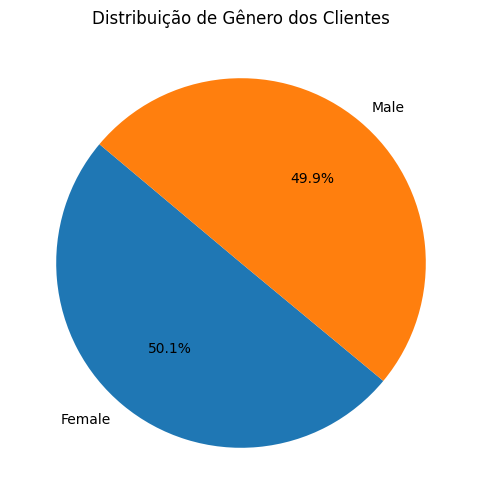

In [21]:
gender_counts = df['gender_customer'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Gênero dos Clientes')
plt.show()


Qual é a localização mais popular para compras (cidade/ramo)?

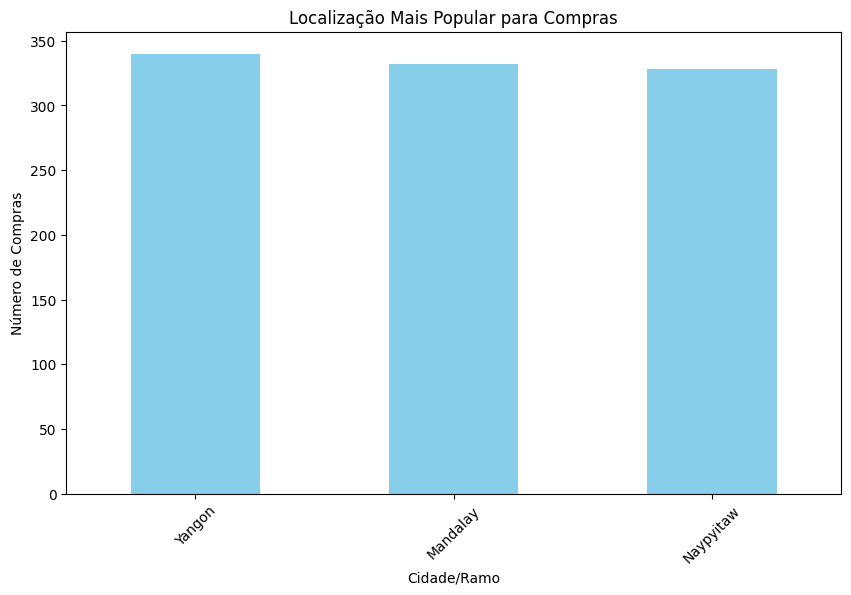

In [22]:
location_counts = df['city'].value_counts()

plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Localização Mais Popular para Compras')
plt.xlabel('Cidade/Ramo')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.show()


## 2. Análise de Vendas ##

Qual é a receita total da loja entre Janeiro e Março de 2019?

In [23]:
start_date = '2019-01-01'
end_date = '2019-03-30'
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]


total_revenue = filtered_df['revenue'].sum()
print(f'Receita Total da Loja no período: ${total_revenue:.2f}')


Receita Total da Loja no período: $322966.75


Qual é a receita média por filial?

In [24]:
# Agrupar por filial e calcular a média da receita
average_revenue_by_branch = df.groupby('branch')['revenue'].mean()
print(average_revenue_by_branch)


branch
A    312.354031
B    319.872506
C    337.099715
Name: revenue, dtype: float64


Qual é o produto mais vendido?

In [25]:
# Encontrar o produto mais vendido
most_sold_product = df['product_line'].value_counts().idxmax()
print(f'O produto mais vendido é: {most_sold_product}')


O produto mais vendido é: Fashion accessories


Qual é a categoria de produtos mais lucrativa?

In [26]:
# Calcular a receita total por categoria de produtos
category_revenue = df.groupby('product_line')['revenue'].sum()
most_profitable_category = category_revenue.idxmax()
print(f'A categoria de produtos mais lucrativa é: {most_profitable_category}')


A categoria de produtos mais lucrativa é: Food and beverages


Qual é a margem bruta média?

In [27]:
# Calcular a margem bruta média
average_gross_margin = df['gm_pct'].mean()
print(f'Margem Bruta Média: {average_gross_margin:.2f}%')


Margem Bruta Média: 4.76%


## 3. Análise de Preços ##

Qual é a faixa de preço médio dos produtos?

In [28]:
# Calcular a média dos preços dos produtos
average_price = df['unit_cost'].mean()

# Calcular o intervalo (mínimo e máximo) dos preços
min_price = df['unit_cost'].min()
max_price = df['unit_cost'].max()

print(f'Preço Médio dos Produtos: ${average_price:.2f}')
print(f'Faixa de Preço: ${min_price:.2f} a ${max_price:.2f}')


Preço Médio dos Produtos: $55.67
Faixa de Preço: $10.08 a $99.96


## 4. Análise de Comportamento de Compra ##

Qual é o horário de pico de compras?

In [38]:
df['Hour'] = df['Datetime'].dt.hour
peak_shopping_hour = df['Hour'].mode().values[0]
print(f'O horário de pico de compras é às {peak_shopping_hour:02d}:00 horas')


O horário de pico de compras é às 19:00 horas
